# HOMEWORK - 7 Link Analysis

In [1]:
!pip install scrapy

grin 1.2.1 requires argparse>=1.1, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 7.1 Create a crawler using the webcrawler

#### Navigate to the desired path and create a Scrapy Project folder

In [2]:
cd C:\Users\Mahesh\Desktop\PyLinkAnalysis\

C:\Users\Mahesh\Desktop\PyLinkAnalysis


In [3]:
%%cmd
scrapy startproject gizmodo

Microsoft Windows [Version 6.1.7601]
Copyright (c) 2009 Microsoft Corporation.  All rights reserved.

(base) C:\Users\Mahesh\Desktop\PyLinkAnalysis>scrapy startproject gizmodo
New Scrapy project 'gizmodo', using template directory 'c:\\users\\mahesh\\anaconda2\\lib\\site-packages\\scrapy\\templates\\project', created in:
    C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo

You can start your first spider with:
    cd gizmodo
    scrapy genspider example example.com

(base) C:\Users\Mahesh\Desktop\PyLinkAnalysis>

In [4]:
cd gizmodo\

C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo


#### Generate one scrapy spider

In [5]:
%%cmd
scrapy genspider gizmodospider https://gizmodo.com

Microsoft Windows [Version 6.1.7601]
Copyright (c) 2009 Microsoft Corporation.  All rights reserved.

(base) C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo>scrapy genspider gizmodospider https://gizmodo.com
Created spider 'gizmodospider' using template 'basic' in module:
  gizmodo.spiders.gizmodospider

(base) C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo>

In [6]:
cd C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo\gizmodo\spiders

C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo\gizmodo\spiders


#### Create a file to build and run the webspider

In [7]:
%%writefile gizmodocrawl.py
import scrapy
from scrapy.contrib.spiders import CrawlSpider, Rule
from scrapy.contrib.linkextractors.sgml import SgmlLinkExtractor

class gizmodoitem(scrapy.Item):
    title = scrapy.Field()
    link = scrapy.Field()
    response = scrapy.Field()
    
class gizmodoSpider(scrapy.Spider):
    # name of the spider
    name = 'gizmodocrawler'
    # specify which domains should be accessible for this crawlwr through allowed_domains property
    allowed_domains = ['https://gizmodo.com/']  
    # specify initial URLs that to be accessed at first place
    start_urls = ['https://gizmodo.com/video/',
                  'https://gizmodo.com/c/review/',
                  'https://gizmodo.com/tag/science/',
                  'https://io9.gizmodo.com/',
                  'https://gizmodo.com/c/field-guide/',
                  'https://earther.gizmodo.com/',
                  'https://gizmodo.com/c/design/',
                  'https://paleofuture.gizmodo.com/']
    
    """
    Set rules variable, mention the rules of navigating the sites. 
    The LinkExtractor actually takes parameters to draw navigation boundaries.
    Using restrict_xpaths parameter to set the class for NEXT page.
    
    call_back parameter tells which method to use to access the page elements.
    
    Setting follow=True, allows the crawler to check the rule for Next Page and will keep navigating 
    unless it hits the last page of the listing.
    """
    rules = (Rule(SgmlLinkExtractor(allow=(),restrict_xpaths=('//a[@class="button next"]',)),
                  callback="parse", 
                  follow= True),)
    
    # parse the content of the pages being accessed
    def parse(self, response):
        hxs = scrapy.Selector(response)
        titles = hxs.xpath('//ul/li')
        item = []
        for title in titles:
            item_object = gizmodoitem()
            item_object["title"] = title.xpath("a/text()").extract()
            item_object["link"] = title.xpath("a/@href").extract()
            item_object["response"] = response
            if item_object["title"] != []:
                item.append(item_object)

        return item

Writing gizmodocrawl.py


**References**

https://scrapy.org/

https://blog.michaelyin.info/scrapy-tutorial-5-how-create-simple-scrapy-spider/

https://medium.com/python-pandemonium/develop-your-first-web-crawler-in-python-scrapy-6b2ee4baf954

#### Write the output of the above, title-link-reponse to a .csv file

In [8]:
%%cmd
scrapy crawl gizmodocrawler -o ctcrawl.csv -t csv

Microsoft Windows [Version 6.1.7601]
Copyright (c) 2009 Microsoft Corporation.  All rights reserved.

(base) C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo\gizmodo\spiders>scrapy crawl gizmodocrawler -o ctcrawl.csv -t csv

(base) C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo\gizmodo\spiders>

C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo\gizmodo\spiders\gizmodocrawl.py:2: ScrapyDeprecationWarning: Module `scrapy.contrib.spiders` is deprecated, use `scrapy.spiders` instead
  from scrapy.contrib.spiders import CrawlSpider, Rule
C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo\gizmodo\spiders\gizmodocrawl.py:3: ScrapyDeprecationWarning: Module `scrapy.contrib.linkextractors` is deprecated, use `scrapy.linkextractors` instead
  from scrapy.contrib.linkextractors.sgml import SgmlLinkExtractor
C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo\gizmodo\spiders\gizmodocrawl.py:3: ScrapyDeprecationWarning: Module `scrapy.contrib.linkextractors.sgml` is deprecated, use `scrapy.linkextractors.sgml` instead
  from scrapy.contrib.linkextractors.sgml import SgmlLinkExtractor
C:\Users\Mahesh\Desktop\PyLinkAnalysis\gizmodo\gizmodo\spiders\gizmodocrawl.py:35: ScrapyDeprecationWarning: SgmlLinkExtractor is deprecated and will be removed in future releases. Please use scrapy.linkextractors.LinkExt

## 7.2  Create a Stochastic matrix from its resulting crawling

In [10]:
# PageRank algorithm
from numpy import *

def pagerank(H):
    n = len(H)
    w = zeros(n)
    rho = 1./n * ones(n);
    for i in range(n):
        if multiply.reduce(H[i]== zeros(n)):
            w[i] = 1
    newH = H + outer((1./n * w),ones(n))
 
    theta=0.85
    G = (theta * newH) + ((1-theta) * outer(1./n * ones(n), ones(n)))
    #print rho
    for j in range(10):
        rho = dot(rho,G)
        #print rho
    
    return list(rho)

#### Stochastic matrix

In [11]:
import pandas as pd
import numpy as np

link_list = []
raw = pd.read_csv("ctcrawl.csv")
raw['link'] = 'https://gizmodo.com' + raw['link']
a = raw['response'][0]
link_list.append((a.split()[-1]).split('>')[-2])
for i in range(len(raw)):
    if raw['response'][i] == a:
        link_list.append(raw['link'][i])
    else:
        a = raw['response'][i]
        link_list.append((a.split()[-1]).split('>')[-2])
        
item = list(pd.DataFrame(link_list)[0].unique())

link = []
length = len(link_list)
for i, val in enumerate(link_list):
    if i < length-1:
        link.append((link_list[i], link_list[i+1]))

mydataframe = pd.DataFrame(index=item, columns=item)
df = mydataframe.replace(np.NaN, 0)
for i in link:
    df.loc[i] = 1.0

arr = np.array(df)
arr_sum = arr.sum(axis=1)

result = arr/arr_sum[:, np.newaxis]
matrix = np.nan_to_num(result)
pg = pagerank(matrix)
value = ((pd.DataFrame(pg)).sort_values(0, ascending=False)).head(5)
index = list(value.index)
url = pd.DataFrame(item)
print "Top five URLs:"
for i in index:
    print url[0][i]

Top five URLs:
https://gizmodo.com#
https://gizmodo.com//deadspin.com
https://gizmodo.com//jalopnik.com
https://gizmodo.com//jezebel.com
https://gizmodo.com//kotaku.com


## 7.3 Pass it through the Page Rank algorithm and provide the list of the top 5 page URLs

In [12]:
# Passing the matrix through PageRank algorithm to list the top 5 URLs
import pandas as pd
import numpy as np

link_list = []
raw = pd.read_csv("ctcrawl.csv")
raw['link'] = 'https://gizmodo.com' + raw['link']
a = raw['response'][0]
link_list.append((a.split()[-1]).split('>')[-2])
for i in range(len(raw)):
    if raw['response'][i] == a:
        link_list.append(raw['link'][i])
    else:
        a = raw['response'][i]
        link_list.append((a.split()[-1]).split('>')[-2])
        
item = list(pd.DataFrame(link_list)[0].unique())

link = []
length = len(link_list)
for i, val in enumerate(link_list):
    if i < length-1:
        link.append((link_list[i], link_list[i+1]))

mydataframe = pd.DataFrame(index=item, columns=item)
df = mydataframe.replace(np.NaN, 0)
for i in link:
    df.loc[i] = 1.0
    
arr = np.array(df)
arr_sum = arr.sum(axis=1)

result = arr/arr_sum[:, np.newaxis]
matrix = np.nan_to_num(result)
pg = pagerank(matrix)
value = ((pd.DataFrame(pg)).sort_values(0, ascending=False)).head(5)
index = list(value.index)
url = pd.DataFrame(item)
print "Top 5 URLs:"
for i in index:
    print url[0][i]

Top 5 URLs:
https://gizmodo.com#
https://gizmodo.com//deadspin.com
https://gizmodo.com//jalopnik.com
https://gizmodo.com//jezebel.com
https://gizmodo.com//kotaku.com


**References**

https://cs7083.wordpress.com/2013/01/31/demystifying-the-pagerank-and-hits-algorithms/

## 7.4 HITS algorithm

**Hypertext Induced Topics Search(HITS) algorithm** computes two numbers for a node. 
Authorities estimates the node value based on the incoming links. Hubs estimates the node value based on outgoing links.

In [13]:
# HITS algorithm
def hits(A):
    n= len(A)
    Au= dot(transpose(A),A)
    Hu = dot(A,transpose(A))
    a = ones(n); h = ones(n)
    #print a,h
    for j in range(5):
        a = dot(a,Au)
        a= a/sum(a)
        h = dot(h,Hu)
        h = h/ sum(h)
    return h

**Listing top 5 URLs for Gizmodo using HITS algorithm**

In [14]:
value = pd.DataFrame(hits(arr))
sort = (value.sort_values(0, ascending=False)).head(5)
hit = list(sort.index)
url = pd.DataFrame(item)
print "Top 5 page URLs:"
for i in hit:
    print  (url[0][i])

Top 5 page URLs:
https://gizmodo.com#
https://earther.gizmodo.com/
https://gizmodo.com//paleofuture.gizmodo.com
https://io9.gizmodo.com/
https://gizmodo.com/tag/science


**References**

https://cs7083.wordpress.com/2013/01/31/demystifying-the-pagerank-and-hits-algorithms/

## 7.5 Weighted PageRank algorithm

**The Weighted PageRank algorithm (WPR)**, is an extensionto the standard PageRank algorithm. WPR takes into account the importance of both the in-links and the out-links of the pages and distributes rank scores based on the popularity of the pages. 
WPR performs better than the conventional PageRank algorithm in terms of returning larger number of relevant pages to a given query.

In [15]:
import numpy as np
from scipy.sparse import csc_matrix
import random

def column(matrix, i):
    return [row[i] for row in matrix]

"""
Computes the pagerank for each of the n values.
G: matrix representing state transitions.
s: probability of following a transition. Defaults to 0.85
maxerr: if the sum of pageranks between iterations is below this it will
            be converged. Defaults to 0.001
"""

def wpr(G, s = 0.85, maxerr = .001):
    
    n = G.shape[0]

    # transform G into markov matrix M
    M = csc_matrix(G,dtype=np.float)
    rsums = np.array(M.sum(1))[:,0]
    ri, ci = M.nonzero()
    M.data /= rsums[ri]

    # bool array of sink values
    sink = rsums==0
    
    # Compute pagerank 'r' until it is converged
    ro, r = np.zeros(n), np.ones(n)
    while np.sum(np.abs(r-ro)) > maxerr:
        ro = r.copy()
        # calculate each pagerank at a time
        for i in xrange(0,n):
            # inlinks of value i
            Ii = np.array(M[:,i].todense())[:,0]
            # account for sink values
            Si = sink / float(n)
            
            Ti = np.ones(n) / float(n)
            
            # Weighted PageRank Equation
            r[i] = ro.dot( Ii*s + Si*s + Ti*(1-s)*G[i] ) 


    # return normalized pagerank
    return r/sum(r)

**References**

https://gist.github.com/dheerajrajagopal/2915436

**Listing top 10 URLs for Gizmodo using WPR algorithm**

In [17]:
value = pd.DataFrame(wpr(arr))
sort = (value.sort_values(0, ascending=False)).head(10)
hit = list(sort.index)
url = pd.DataFrame(item)
print "Top 10 page URLs:"
for i in hit:
    print  (url[0][i])

Top 5 page URLs:
https://gizmodo.com//theinventory.com
https://gizmodo.com/about
https://gizmodo.comhttps://kinja.zendesk.com/
https://gizmodo.comhttps://legal.kinja.com/content-guidelines-90185358
nan
https://gizmodo.comhttps://legal.kinja.com/privacy-policy-90190742
https://gizmodo.com//deadspin.com
https://gizmodo.comhttps://legal.kinja.com/kinja-terms-of-use-1793094100
https://gizmodo.com//jalopnik.com
https://gizmodo.com//clickhole.com


## 7.6 Moler PageRank algorithm

This is an algorithm by **Cleve Mole**, which takes the full advantage of sparse matrix operations. 

Two versions of the PageRank algorithm - Exact Solution and PowerMethod which are based on sparse fast solutions. The power method is much faster with enough precision.

Input Format
The input is a 2d array, each row of the array is an edge of the graph $[[a,b], [c,d]]$, $a$ and $b$ are the node numbers. The personalization vector is probability distribution over the nodes.

Comparison with Networkx
Both of the implementation (Exact Solution and PowerMethod) are much faster than their correspondent method in NetworkX

In [33]:
from __future__ import division

import scipy as sp
import scipy.sparse as sprs
import scipy.spatial
import scipy.sparse.linalg 


def create_csr(Z):
    """ Creates a csr presentation from 2darray presentation
    Args:
        Z: input graph in the form of a 2d array, such as sp.array([[2,0], [1,2], [2,1]])
    Returns:
        a csr representation
    
    """   
    rows = Z[:,0];
    cols = Z[:,1];
    n = max(max(rows), max(cols))+1;
    G=sprs.csr_matrix((sp.ones(rows.shape),(rows,cols)), shape=(n,n));
    return G

def moler_pagerank_sparse(G, p=0.85, personalize=None, reverse=False):
    """ Calculates pagerank given a csr graph
    
    Args:
        G: a csr graph.
        p: damping factor
        personlize: if not None, should be an array with the size of the nodes
                    containing probability distributions. It will be normalized automatically
        reverse: If true, returns the reversed-pagerank 
        
    Returns:
        Pagerank Scores for the nodes
     
    """
    # In Moler's algorithm, $G_{ij}$ represents the existences of an edge
    # from node $j$ to $i$, while we have assumed the opposite!
    if not reverse: 
        G=G.T;

    n,n=G.shape
    c=sp.asarray(G.sum(axis=0)).reshape(-1)
    r=sp.asarray(G.sum(axis=1)).reshape(-1)

    k=c.nonzero()[0]

    D=sprs.csr_matrix((1/c[k],(k,k)),shape=(n,n))

    if personalize is None:
        personalize=sp.ones(n) 
    personalize=personalize.reshape(n,1)
    e=(personalize/personalize.sum())*n 

    I=sprs.eye(n)
    x = sprs.linalg.spsolve((I - p*G.dot(D)), e);

    x=x/x.sum()
    return x

def moler_pagerank_sparse_power(G, p=0.85, max_iter = 100,  tol=1e-06,personalize=None, reverse=False):
    """ Calculates pagerank given a csr graph
    
    Args:
        G: a csr graph.
        p: damping factor
        max_iter: maximum number of iterations
        personlize: if not None, should be an array with the size of the nodes
                    containing probability distributions. It will be normalized automatically
        reverse: If true, returns the reversed-pagerank 
        
    Returns:
        Pagerank Scores for the nodes
     
    """
    # In Moler's algorithm, $G_{ij}$ represents the existences of an edge
    # from node $j$ to $i$, while we have assumed the opposite!
    if not reverse: 
        G=G.T;

    n,n=G.shape
    c=sp.asarray(G.sum(axis=0)).reshape(-1)
    r=sp.asarray(G.sum(axis=1)).reshape(-1)

    k=c.nonzero()[0]

    D=sprs.csr_matrix((1/c[k],(k,k)),shape=(n,n))

    if personalize is None:
        personalize=sp.ones(n) 
    personalize=personalize.reshape(n,1)
    e=(personalize/personalize.sum())*n 
    
    
    z = (((1-p)*(c!=0) + (c==0))/n)[sp.newaxis,:]
    G = p*G.dot(D)
    
    x = e/n 
    oldx = sp.zeros((n,1));
    
    iteration = 0
    
    while sp.linalg.norm(x-oldx) > tol:
        oldx = x
        x = G.dot(x) + e.dot(z.dot(x))
        iteration += 1
        if iteration >= max_iter:
            break;
    x = x/sum(x)
    
    return x.reshape(-1)

#### Comparing Exact Methods

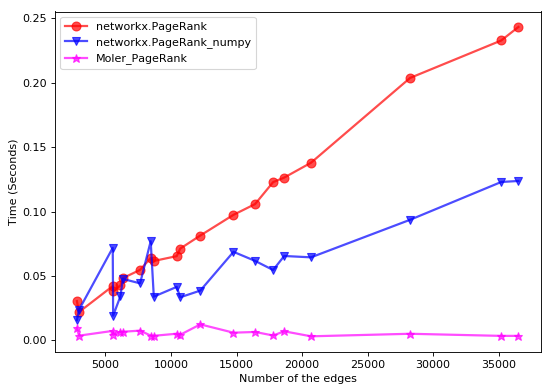

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')

argsort = size_vector.argsort()

size_vector_sorted = size_vector[argsort]
netx_pagerank_sorted = netx_pagerank[argsort]
netx_pagerank_numpy_sorted = netx_pagerank_numpy[argsort]
moler_pagerank_sorted = moler_pagerank[argsort]



plt.plot(size_vector_sorted, netx_pagerank_sorted, 'o-',  ms=8, lw=2,alpha=0.7, color='red', label='networkx.PageRank')
plt.plot(size_vector_sorted, netx_pagerank_numpy_sorted, 'v-', ms=8, lw=2,alpha=0.7, color='blue', label='networkx.PageRank_numpy')
plt.plot(size_vector_sorted, moler_pagerank, '*-', ms=8, lw=2,alpha=0.7, color='magenta', label='Moler_PageRank')

plt.xlabel('Number of the edges')
plt.ylabel('Time (Seconds)')


plt.tight_layout()
plt.legend(loc=2)
plt.savefig('pagerank_exact.eps')
plt.show()

#### Comparing Approximation Methods (Power Methods)

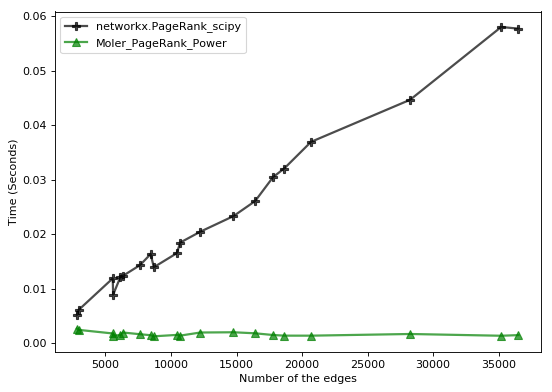

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(num=None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')

argsort = size_vector.argsort()

size_vector_sorted = size_vector[argsort]
netx_pagerank_scipy_sorted = netx_pagerank_scipy[argsort]
moler_pagerank_power_sorted = moler_pagerank_power[argsort]



plt.plot(size_vector_sorted, netx_pagerank_scipy_sorted, 'P-', ms=8, lw=2,alpha=0.7, color='black', label='networkx.PageRank_scipy')
plt.plot(size_vector_sorted, moler_pagerank_power, '^-', ms=8, lw=2,alpha=0.7, color='green', label='Moler_PageRank_Power')

plt.xlabel('Number of the edges')
plt.ylabel('Time (Seconds)')


plt.tight_layout()
plt.legend(loc=2)
plt.savefig('pagerank.eps')
plt.show()

**References**

https://github.com/asajadi/moler_pagerank/blob/master/Moler_PageRank.ipynb

https://www.mathworks.com/moler/exm.html